Epoch [100/1000], Loss: 8.7811
Epoch [200/1000], Loss: 8.2822
Epoch [300/1000], Loss: 8.0084
Epoch [400/1000], Loss: 7.8580
Epoch [500/1000], Loss: 7.7755
Epoch [600/1000], Loss: 7.7302
Epoch [700/1000], Loss: 7.7053
Epoch [800/1000], Loss: 7.6916
Epoch [900/1000], Loss: 7.6841
Epoch [1000/1000], Loss: 7.6800


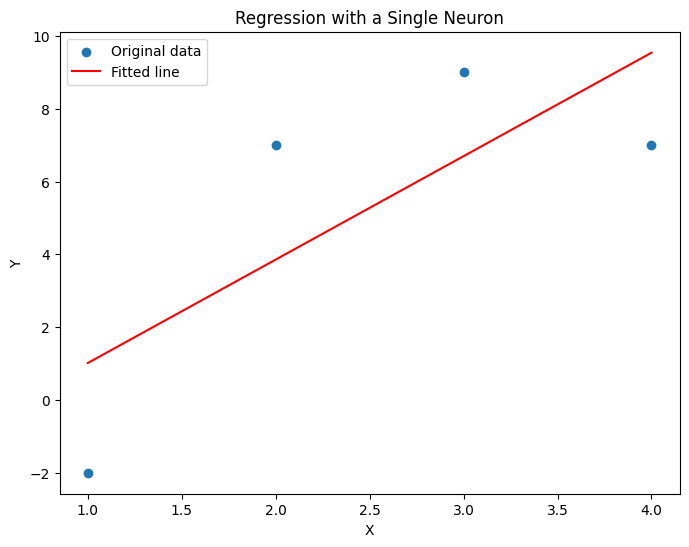

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the dataset
# Simple linear dataset y = 2x + 1
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[-2.0], [7.0], [9.0], [7.0]])

# Define the single neuron model
class SingleNeuron(nn.Module):
    def __init__(self):
        super(SingleNeuron, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input, one output

    def forward(self, x):
        return self.linear(x)

model = SingleNeuron()

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), predicted, label='Fitted line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regression with a Single Neuron')
plt.show()

Epoch [100/1000], Loss: 0.5535
Epoch [200/1000], Loss: 0.5337
Epoch [300/1000], Loss: 0.5152
Epoch [400/1000], Loss: 0.4980
Epoch [500/1000], Loss: 0.4820
Epoch [600/1000], Loss: 0.4669
Epoch [700/1000], Loss: 0.4528
Epoch [800/1000], Loss: 0.4396
Epoch [900/1000], Loss: 0.4272
Epoch [1000/1000], Loss: 0.4156


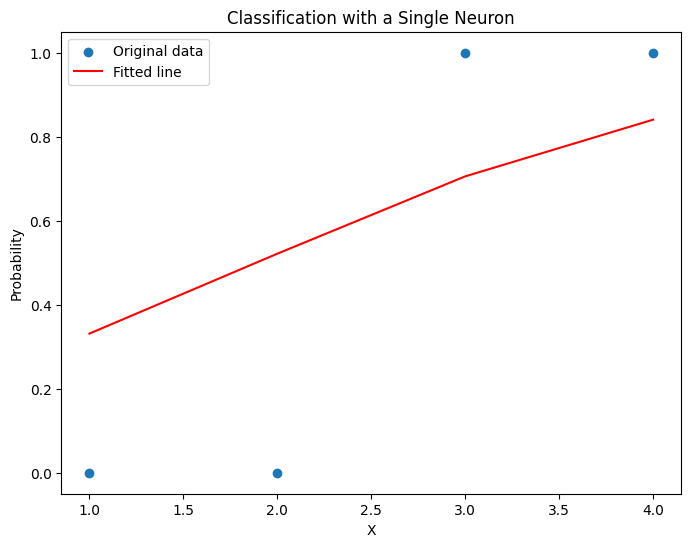

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the dataset
# Simple binary classification dataset
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[0.0], [0.0], [1.0], [1.0]])

# Define the single neuron model
class SingleNeuron(nn.Module):
    def __init__(self):
        super(SingleNeuron, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input, one output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation for binary classification

model = SingleNeuron()

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    optimizer.step()  # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), predicted, label='Fitted line', color='red')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.title('Classification with a Single Neuron')
plt.show()
